Team Members: 
1.	– Hadeer Amr Fawzy (22010450)         cybersecurity 
2.	– Farida Ahmed (2206160)                    cybersecurity
3.	– Muhammed Salah (22010448)          cybersecurity
4.	–Marwan Gaber Ramdan (2206167)   cybersecurity
5.	– Omar Ibrahim Ahmed (2206209)      cybersecurity
6.	– Youssef Tamer Muhammed Ali ()     cybersecurity
7.	– Ahmed Sabe Ahmed (2203185)                ai 


In [12]:

#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import zscore
import matplotlib.pyplot as plt


In [40]:
# read the data set
data = pd.read_csv(r'C:\Users\ranee\Dropbox\PC\Desktop\URL\urlcleaned.csv', low_memory=False)
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000.0,1.0,0.0,12.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.800000,0.795729,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000.0,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0.000000,0.768577,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000.0,0.0,0.0,12.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0.000000,0.726582,1
3,mail.printakid.com/www.online.americanexpress....,10000000.0,0.0,0.0,6.0,363.000000,384.000000,0.0,0.0,0.0,0.0,0.000000,0.859394,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000.0,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0.000000,0.748971,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95908,xbox360.ign.com/objects/850/850402.html,339.0,1.0,0.0,2.0,142.500000,141.000000,0.0,0.0,0.0,0.0,0.450980,0.846906,0
95909,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029.0,1.0,0.0,3.0,114.000000,128.333333,0.0,0.0,0.0,0.0,0.750000,0.714623,0
95910,www.gamespot.com/xbox360/action/deadspace/,753.0,1.0,0.0,3.0,91.000000,101.333333,0.0,0.0,0.0,0.0,0.111111,0.648571,0
95911,en.wikipedia.org/wiki/Dead_Space_(video_game),211.0,1.0,0.0,4.0,363.000000,384.000000,0.0,0.0,0.0,0.0,0.809735,0.840323,0


In [3]:
# Try to convert columns manually (force errors to NaN)
cols_to_float = [
    "ranking", "mld_res", "mld.ps_res", "card_rem",
    "ratio_Rrem", "ratio_Arem", "jaccard_RR",
    "jaccard_RA", "jaccard_AR", "jaccard_AA",
    "jaccard_ARrd", "jaccard_ARrem"
]

for col in cols_to_float:
    data[col] = pd.to_numeric(data[col], errors="coerce")  # invalid values --> NaN

# Step 3: Ensure label is integer
data["label"] = pd.to_numeric(data["label"], errors="coerce").fillna(0).astype(int)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96011 entries, 0 to 96010
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96007 non-null  object 
 1   ranking        95921 non-null  float64
 2   mld_res        95925 non-null  float64
 3   mld.ps_res     95925 non-null  float64
 4   card_rem       95925 non-null  float64
 5   ratio_Rrem     95925 non-null  float64
 6   ratio_Arem     95925 non-null  float64
 7   jaccard_RR     95924 non-null  float64
 8   jaccard_RA     95923 non-null  float64
 9   jaccard_AR     95922 non-null  float64
 10  jaccard_AA     95921 non-null  float64
 11  jaccard_ARrd   95920 non-null  float64
 12  jaccard_ARrem  95917 non-null  float64
 13  label          96011 non-null  int64  
 14  Unnamed: 14    2 non-null      float64
dtypes: float64(13), int64(1), object(1)
memory usage: 11.0+ MB


In [5]:
# Drop column ["Unnamed"] beacuse it is not useful and all values is NAN
data.drop(data.columns[14], axis=1, inplace=True)
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000.0,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000.0,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000.0,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1
3,mail.printakid.com/www.online.americanexpress....,10000000.0,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000.0,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96006,xbox360.ign.com/objects/850/850402.html,339.0,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0
96007,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029.0,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0
96008,www.gamespot.com/xbox360/action/deadspace/,753.0,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0
96009,en.wikipedia.org/wiki/Dead_Space_(video_game),6.0,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0


In [6]:
# Describe the data
data.describe()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
count,9.592100e+04,9.592500e+04,95925.000000,95925.000000,95925.000000,95925.000000,95924.000000,95923.000000,95922.000000,95921.000000,95920.000000,95917.000000,96011.000000
mean,5.888234e+06,3.132019e+02,0.206149,4.580402,135.252548,138.544869,0.008613,0.003808,0.003378,0.003661,0.307756,0.703606,0.498943
std,4.878506e+06,5.592296e+04,0.874633,4.466075,160.988266,175.478722,0.846011,0.025638,0.024010,0.028492,0.363093,0.204271,0.500001
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.530900e+04,0.000000e+00,0.000000,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.675079,0.000000
50%,1.000000e+07,0.000000e+00,0.000000,3.000000,104.000000,103.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.768166,0.000000
75%,1.000000e+07,1.000000e+00,0.000000,6.000000,174.142857,178.300000,0.000000,0.000000,0.000000,0.000000,0.666667,0.818945,1.000000
max,1.000000e+07,1.000000e+07,189.000000,187.333333,5507.000000,6097.000000,183.750000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Check duplicates
data.duplicated().sum()

np.int64(4)

In [8]:
#Remove the duplicates 
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [9]:
# Check nulls 
data.isnull().sum()

domain            1
ranking          87
mld_res          83
mld.ps_res       83
card_rem         83
ratio_Rrem       83
ratio_Arem       83
jaccard_RR       84
jaccard_RA       85
jaccard_AR       86
jaccard_AA       87
jaccard_ARrd     88
jaccard_ARrem    91
label             0
dtype: int64

In [10]:
# Remove nulls
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95913 entries, 0 to 96010
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         95913 non-null  object 
 1   ranking        95913 non-null  float64
 2   mld_res        95913 non-null  float64
 3   mld.ps_res     95913 non-null  float64
 4   card_rem       95913 non-null  float64
 5   ratio_Rrem     95913 non-null  float64
 6   ratio_Arem     95913 non-null  float64
 7   jaccard_RR     95913 non-null  float64
 8   jaccard_RA     95913 non-null  float64
 9   jaccard_AR     95913 non-null  float64
 10  jaccard_AA     95913 non-null  float64
 11  jaccard_ARrd   95913 non-null  float64
 12  jaccard_ARrem  95913 non-null  float64
 13  label          95913 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 11.0+ MB


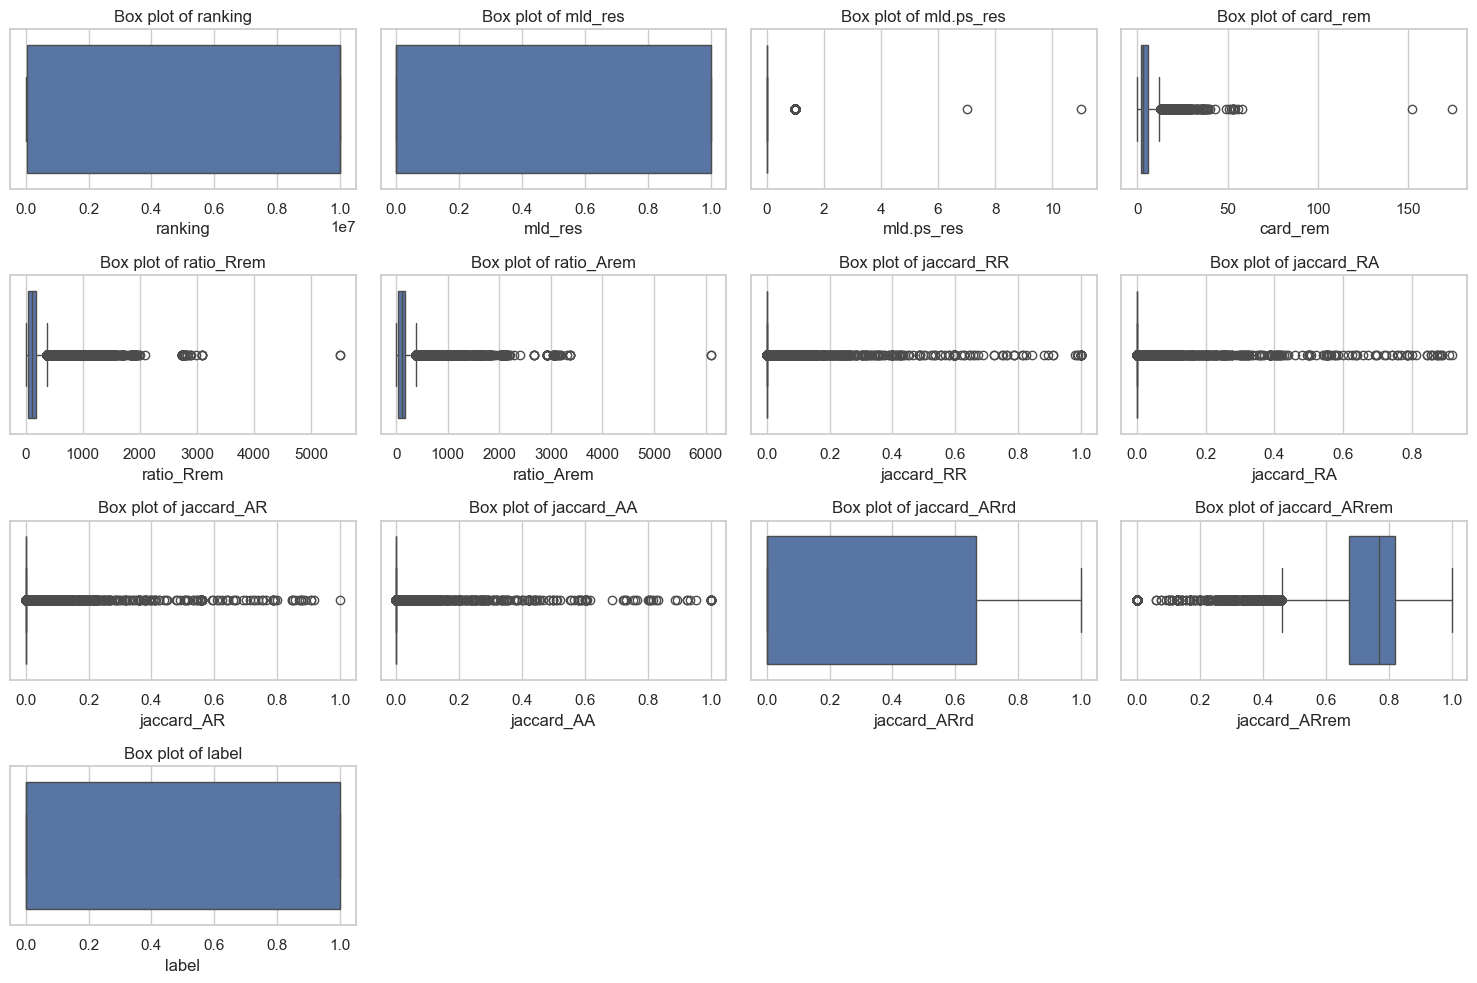

In [13]:
# Check Outliers
# Set the plot style
sns.set(style="whitegrid")

# Create a box plot for each numerical feature in the dataset
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows/columns based on the number of features
    sns.boxplot(x=data[feature])
    plt.title(f"Box plot of {feature}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [14]:
# List of columns to check for outliers
columns_to_check = [
    'domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem',
    'ratio_Rrem', 'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR',
    'jaccard_AA', 'jaccard_ARrd', 'jaccard_ARrem', 'label'
]

# Check for outliers for each specified column
for feature in columns_to_check:
    if data[feature].dtype in ['float64', 'int64']:  # Check if the feature is numeric
        # Calculate IQR (Interquartile Range)
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

        # Print the number of outliers for each numeric column
        print(f"Number of outliers in {feature}: {len(outliers)}")
    else:
        print(f"{feature} is not numeric and cannot have outliers detected.")


domain is not numeric and cannot have outliers detected.
Number of outliers in ranking: 0
Number of outliers in mld_res: 0
Number of outliers in mld.ps_res: 19419
Number of outliers in card_rem: 5228
Number of outliers in ratio_Rrem: 4626
Number of outliers in ratio_Arem: 4756
Number of outliers in jaccard_RR: 19052
Number of outliers in jaccard_RA: 20631
Number of outliers in jaccard_AR: 18228
Number of outliers in jaccard_AA: 19060
Number of outliers in jaccard_ARrd: 0
Number of outliers in jaccard_ARrem: 7208
Number of outliers in label: 0


In [15]:
# Loop through each column and clean outliers by replacing them with the respective quantile means
for feature in columns_to_check:
    if data[feature].dtype in ['int64', 'float64']:  # Check if column is numeric
        # Calculate the 5th and 95th percentiles
        lower_cap = data[feature].quantile(0.05)
        upper_cap = data[feature].quantile(0.95)
        
        # Calculate the mean of values below the 5th percentile and above the 95th percentile
        lower_mean = data[data[feature] < lower_cap][feature].mean()
        upper_mean = data[data[feature] > upper_cap][feature].mean()

        # Replace values below the 5th percentile with the mean of the 0.05 quantile
        data[feature] = np.where(data[feature] < lower_cap, lower_mean, data[feature])
        
        # Replace values above the 95th percentile with the mean of the 0.95 quantile
        data[feature] = np.where(data[feature] > upper_cap, upper_mean, data[feature])

# Alternatively, use np.clip() to directly cap outliers to the 5th and 95th percentiles
for feature in columns_to_check:
    if data[feature].dtype in ['int64', 'float64']:  # Check if column is numeric
        # Calculate the 5th and 95th percentiles
        lower_cap = data[feature].quantile(0.05)
        upper_cap = data[feature].quantile(0.95)
        
        # Use np.clip() to replace values below the 5th percentile and above the 95th percentile
        data[feature] = np.clip(data[feature], lower_cap, upper_cap)

# Check the results after cleaning
data[columns_to_check].describe()


,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
count,9.591300e+04,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000,95913.000000
mean,5.888625e+06,0.455590,0.202465,4.370231,122.797953,124.733162,0.002564,0.001683,0.001328,0.002305,0.307209,0.702748,0.499432
std,4.878426e+06,0.498026,0.401839,3.457490,97.730190,103.881254,0.007953,0.004201,0.003518,0.007262,0.362148,0.203512,0.500002
min,2.110000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.546700e+04,0.000000,0.000000,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.675079,0.000000
50%,1.000000e+07,0.000000,0.000000,3.000000,104.076923,103.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.768166,0.000000
75%,1.000000e+07,1.000000,0.000000,6.000000,174.142857,178.285714,0.000000,0.000000,0.000000,0.000000,0.666667,0.818945,1.000000
max,1.000000e+07,1.000000,1.000000,13.000000,363.000000,384.000000,0.035638,0.016529,0.013889,0.032615,0.913043,0.859394,1.000000


In [16]:
# Store and print features with outliers
outliers_columns = []

for feature in data.columns:
    if data[feature].dtype in ['float64', 'int64']:  # Check if the feature is numeric
        # Calculate IQR (Interquartile Range)
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

        # If there are outliers, add feature to the list
        if len(outliers) > 0:
            outliers_columns.append((feature, len(outliers)))

# Print features with outliers and their count
print("Features with outliers:")
for feature, count in outliers_columns:
    print(f"{feature}: {count} outliers")


Features with outliers:
mld.ps_res: 19419 outliers
card_rem: 5228 outliers
jaccard_RR: 19052 outliers
jaccard_RA: 20631 outliers
jaccard_AR: 18228 outliers
jaccard_AA: 19060 outliers
jaccard_ARrem: 7208 outliers


In [17]:
# Ensure relevant columns are numeric
columns_to_check = ['mld.ps_res', 'card_rem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA', 'jaccard_ARrem']

# Convert to numeric (forcing errors to NaN)
for feature in columns_to_check:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Now proceed with outlier capping
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap outliers in the specified columns
for feature in columns_to_check:
    data = cap_outliers(data, feature)

print("Outliers capped after ensuring numeric conversion.")


Outliers capped after ensuring numeric conversion.


In [18]:
data.shape

(95913, 14)

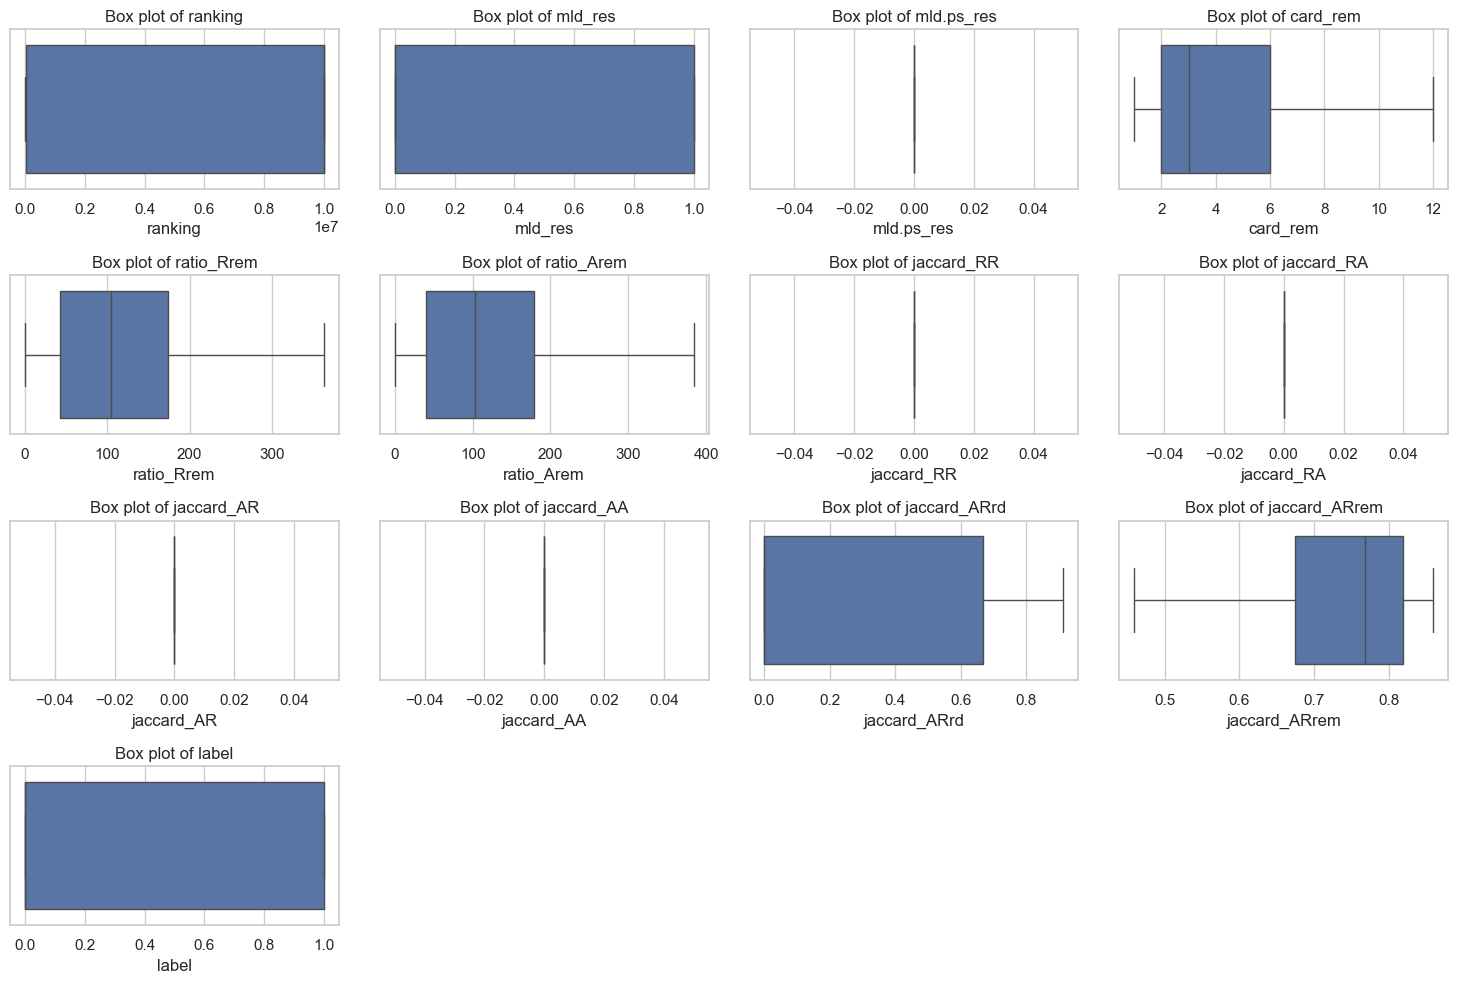

In [19]:
# Check Outliers
# Set the plot style
sns.set(style="whitegrid")

# Create a box plot for each numerical feature in the dataset
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows/columns based on the number of features
    sns.boxplot(x=data[feature])
    plt.title(f"Box plot of {feature}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [20]:
# Store and print features with outliers
outliers_columns = []

for feature in data.columns:
    if data[feature].dtype in ['float64', 'int64']:  # Check if the feature is numeric
        # Calculate IQR (Interquartile Range)
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

        # If there are outliers, add feature to the list
        if len(outliers) > 0:
            outliers_columns.append((feature, len(outliers)))

# Print features with outliers and their count
print("Features with outliers:")
for feature, count in outliers_columns:
    print(f"{feature}: {count} outliers")


Features with outliers:


In [ ]:
data.to_csv(r"C:\Users\ranee\Dropbox\PC\Desktop\urlcleaned.csv", index=False)


In [36]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode'
pio.renderers.default = 'browser'

# Histogram for a numerical column (e.g., 'ratio_Rrem')
fig = px.histogram(data, x="ratio_Rrem", nbins=50, title="Histogram of Ratio Rrem")
fig.show()


In [37]:

# Box plot for a numerical column (e.g., 'ratio_Rrem')
fig = px.box(data, y="ratio_Rrem", title="Box Plot of Ratio Rrem")
fig.show()


In [ ]:
# Scatter plot to show relationship between two continuous variables (e.g., 'mld_res' vs. 'ratio_Rrem')
fig = px.scatter(data, x="mld_res", y="ratio_Rrem", color="label", title="Scatter Plot: MLD Res vs Ratio Rrem")
fig.show()

In [39]:
# Scatter plot with bubble size based on another variable (e.g., 'ranking')
fig = px.scatter(data, x="mld_res", y="ratio_Rrem", size="ranking", color="label", 
                 title="Bubble Chart: MLD Res vs Ratio Rrem with Bubble Size as Ranking")
fig.show()


In [38]:

# 3D scatter plot for three variables (e.g., 'mld_res', 'ratio_Rrem', 'ratio_Arem')
fig = px.scatter_3d(data, x='mld_res', y='ratio_Rrem', z='ratio_Arem', color='label', 
                    title="3D Scatter Plot: MLD Res, Ratio Rrem, and Ratio Arem")
fig.show()


In [42]:

dataset = pd.read_csv(r'C:\Users\ranee\Dropbox\PC\Desktop\URL\urlset_fixed.csv')


dataset = dataset.drop(['domain', 'Unnamed: 14'], axis=1).dropna()


for column in dataset.columns:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')
dataset = dataset.dropna()


X = dataset.drop('label', axis=1)
y = dataset['label']


z_scores = zscore(X)
filtered_entries = (np.abs(z_scores) < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\ranee\AppData\Local\Temp\ipykernel_13676\3007003871.py:1: DtypeWarning:

Columns (1,2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:

svm_simple = SVC(
    C=2.0,
    gamma='scale',
    kernel='rbf',
    class_weight='balanced',
    random_state=42
)

svm_simple.fit(X_train_scaled, y_train)
y_pred = svm_simple.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred)) 

Accuracy: 0.8576
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      8961
         1.0       0.86      0.84      0.85      8158

    accuracy                           0.86     17119
   macro avg       0.86      0.86      0.86     17119
weighted avg       0.86      0.86      0.86     17119



In [ ]:




logreg_boosted = LogisticRegression(
    C=0.01,                  
    penalty='l1',        
    solver='liblinear',      
    class_weight='balanced', 
    max_iter=1000,            
    random_state=42
)
logreg_boosted.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_boosted.predict(X_test_scaled)


if accuracy_score(y_test, y_pred_logreg) < 0.93:
    from sklearn.ensemble import VotingClassifier
    rf = RandomForestClassifier(n_estimators=50, random_state=42)
    
    ensemble = VotingClassifier(
        estimators=[('logreg', logreg_boosted), ('rf', rf)],
        voting='soft'
    )
    ensemble.fit(X_train_scaled, y_train)
    y_pred_logreg = ensemble.predict(X_test_scaled)


acc_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Optimized Logistic Regression Accuracy: {acc_logreg:.4f}")
print(classification_report(y_test, y_pred_logreg))

Optimized Logistic Regression Accuracy: 0.9366
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      8961
         1.0       0.94      0.93      0.93      8158

    accuracy                           0.94     17119
   macro avg       0.94      0.94      0.94     17119
weighted avg       0.94      0.94      0.94     17119



In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaling
y_pred_rf = rf_model.predict(X_test)


print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9494
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      8961
         1.0       0.96      0.94      0.95      8158

    accuracy                           0.95     17119
   macro avg       0.95      0.95      0.95     17119
weighted avg       0.95      0.95      0.95     17119



C:\Users\Lenovo - LOQ\AppData\Local\Temp\ipykernel_27104\3271610238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Blues_d')


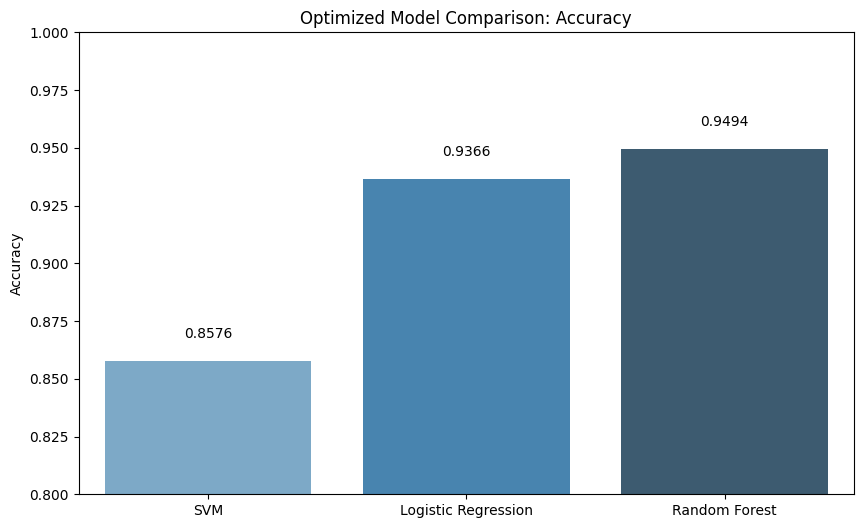

In [ ]:

model_names = ['SVM', 'Logistic Regression', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='Blues_d')
plt.title('Optimized Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

In [14]:


test_features = np.array([[
    10000000,  # ranking
    0,         # mld_res
    0,         # mld.ps_res
    14.0,      # card_rem
    73.5,      # ratio_Rrem
    72.6,      # ratio_Arem
    0.0,       # jaccard_RR
    0.0,       # jaccard_RA
    0.0,       # jaccard_AR
    0.0,       # jaccard_AA
    0,         # jaccard_ARrd
    0.726      # jaccard_ARrem
]])


test_scaled = scaler.transform(test_features)

# 3. Get predictions from all models
svm_pred = svm_simple.predict(test_scaled)[0]       
logreg_pred = logreg_boosted.predict(test_scaled)[0] 
rf_pred = rf_model.predict(test_features)[0]      


print(" FINAL PREDICTIONS ")
print(f"SVM: {'PHISHING' if svm_pred == 1 else 'LEGITIMATE'}")
print(f"Logistic Regression: {'PHISHING' if logreg_pred == 1 else 'LEGITIMATE'}")
print(f"Random Forest: {'PHISHING' if rf_pred == 1 else 'LEGITIMATE'}")

 FINAL PREDICTIONS 
SVM: PHISHING
Logistic Regression: PHISHING
Random Forest: PHISHING


C:\Users\Lenovo - LOQ\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lenovo - LOQ\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
